### Proyecto Regresión Lineal 

Vamos a trabajar con el Data Set Auto-MPG Data

Disponible en https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [5]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
df=pd.read_csv(url,header=None, sep='\s+')
df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Exploración de los Datos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

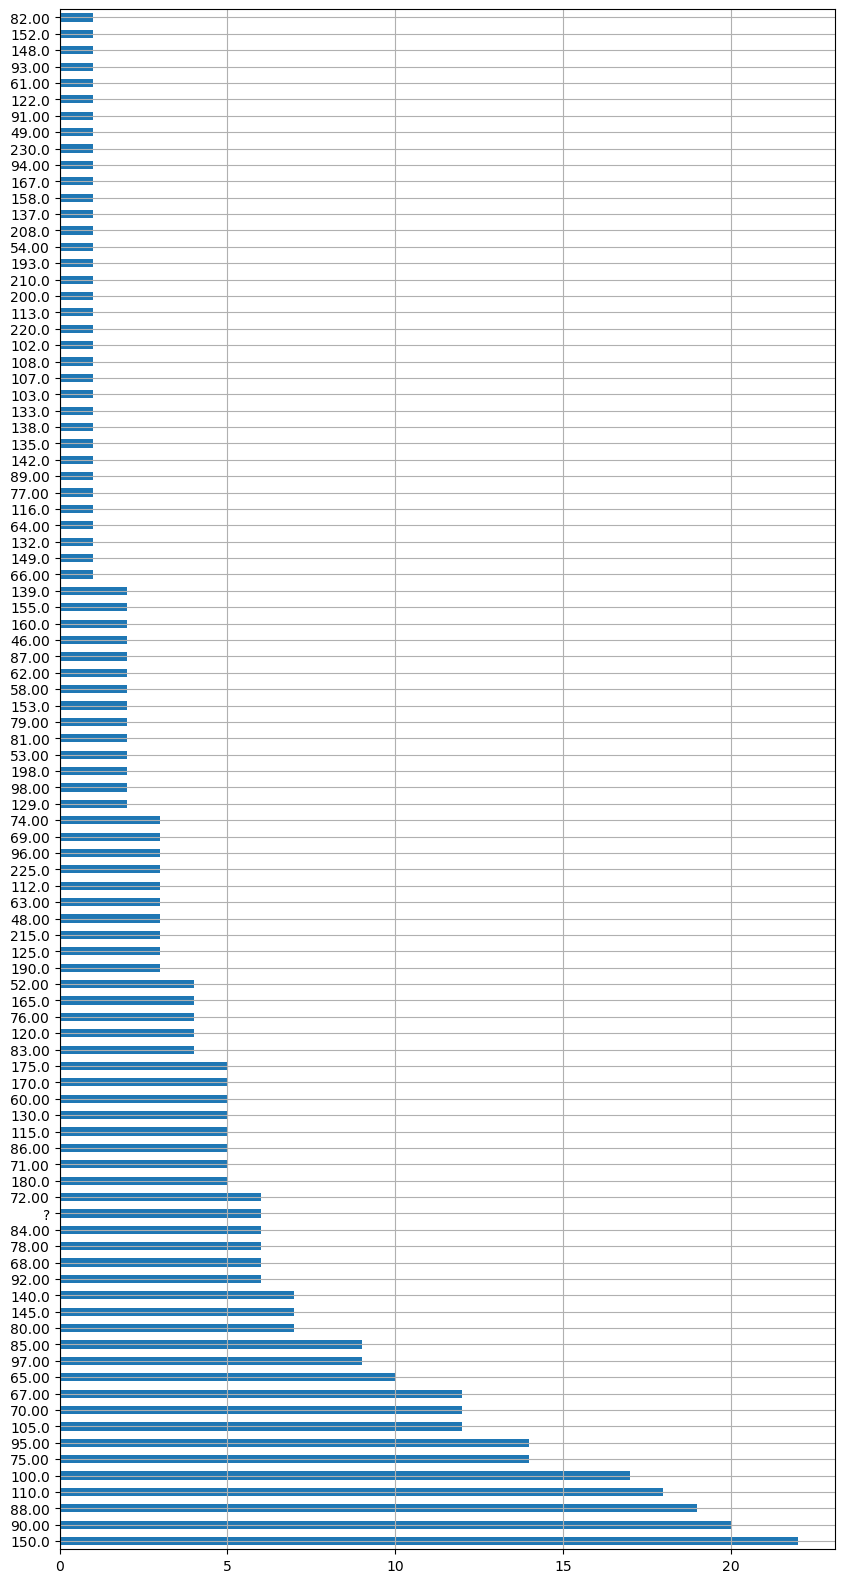

In [12]:
plt.figure(figsize=(10,20))
df['horsepower'].value_counts().plot(kind='barh')
plt.grid()
plt.show()

Como tenemos solo 6 registros 1.5%)  con datos faltantes en horsepower, vamos a eliminarlos 

In [19]:
df_c=df[df['horsepower']!='?'] ## Eliminamos los registros con datos faltantes en horsepower 
## Cambiar el Tipo de Dato de Horsepower 
pd.set_option('mode.chained_assignment', None)
df_c['horsepower']=df_c['horsepower'].astype(float)
df_c['origin']=df_c['origin'].astype(object)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   car name      392 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 30.6+ KB


In [20]:
df_c.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


### Explorando los Datos 

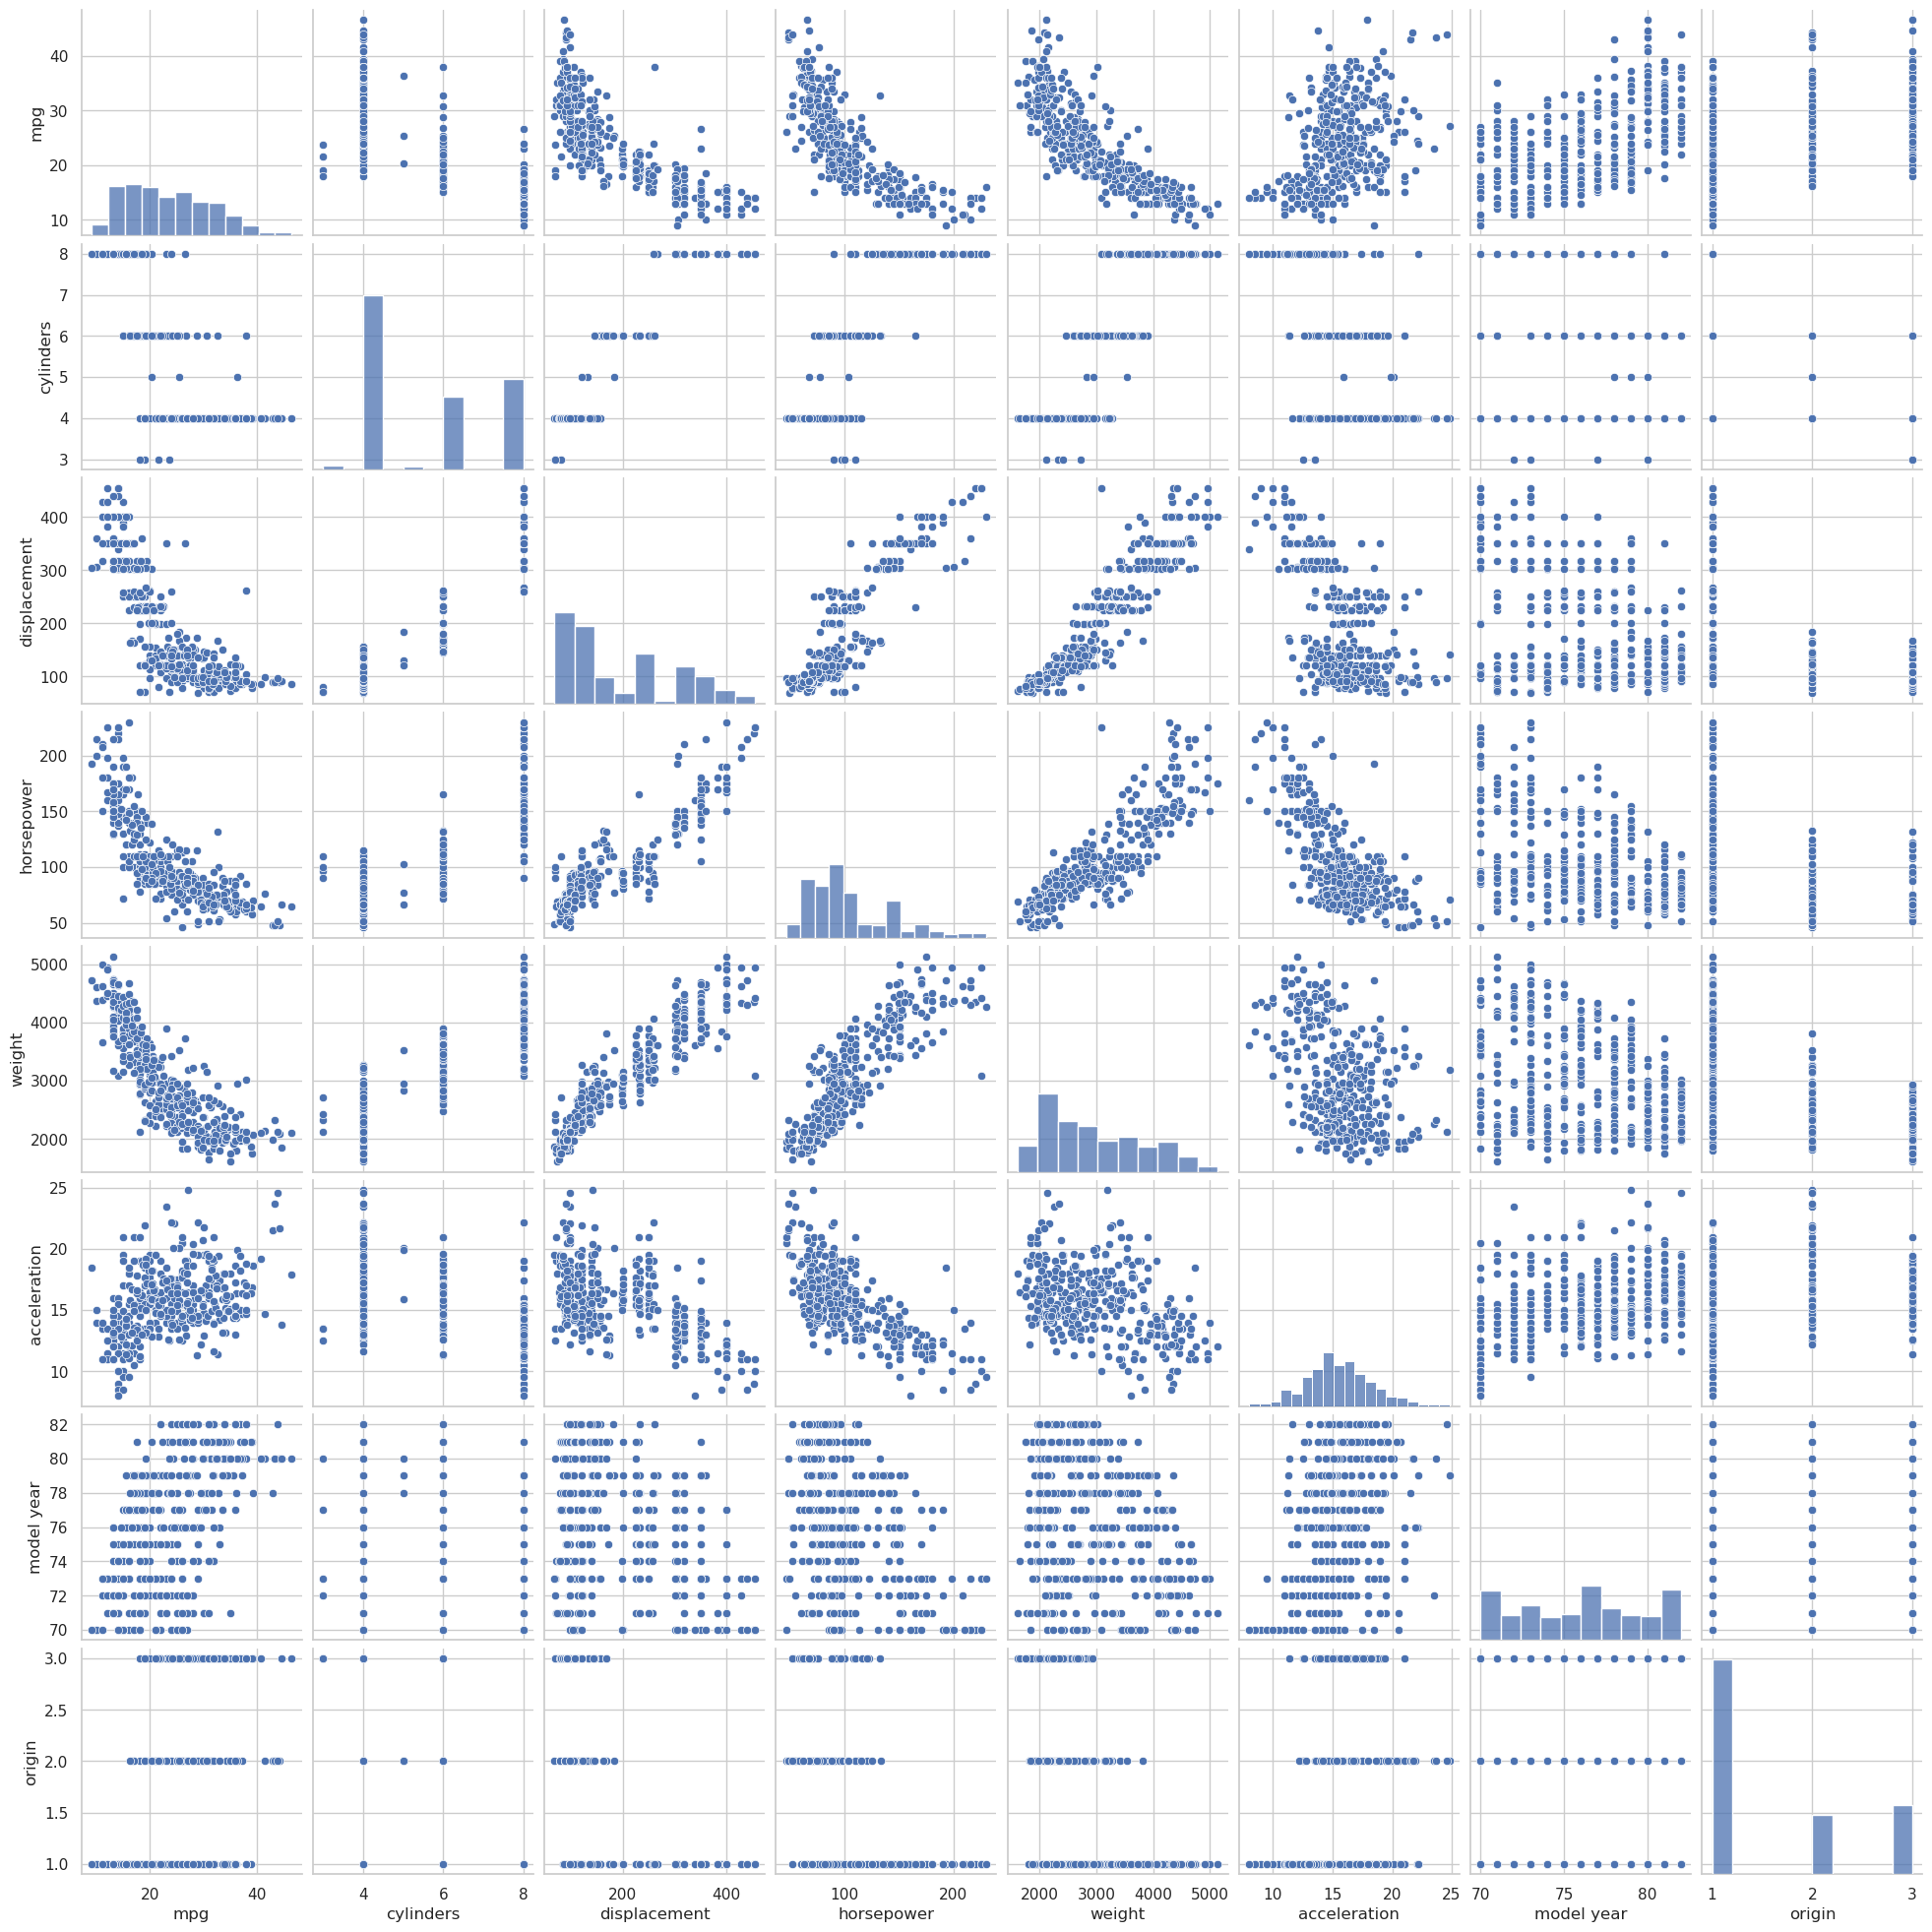

In [21]:
import seaborn as sns
sns.set(style='whitegrid',context='notebook')
sns.pairplot(df_c)

## Explorando la Variable Car Name 

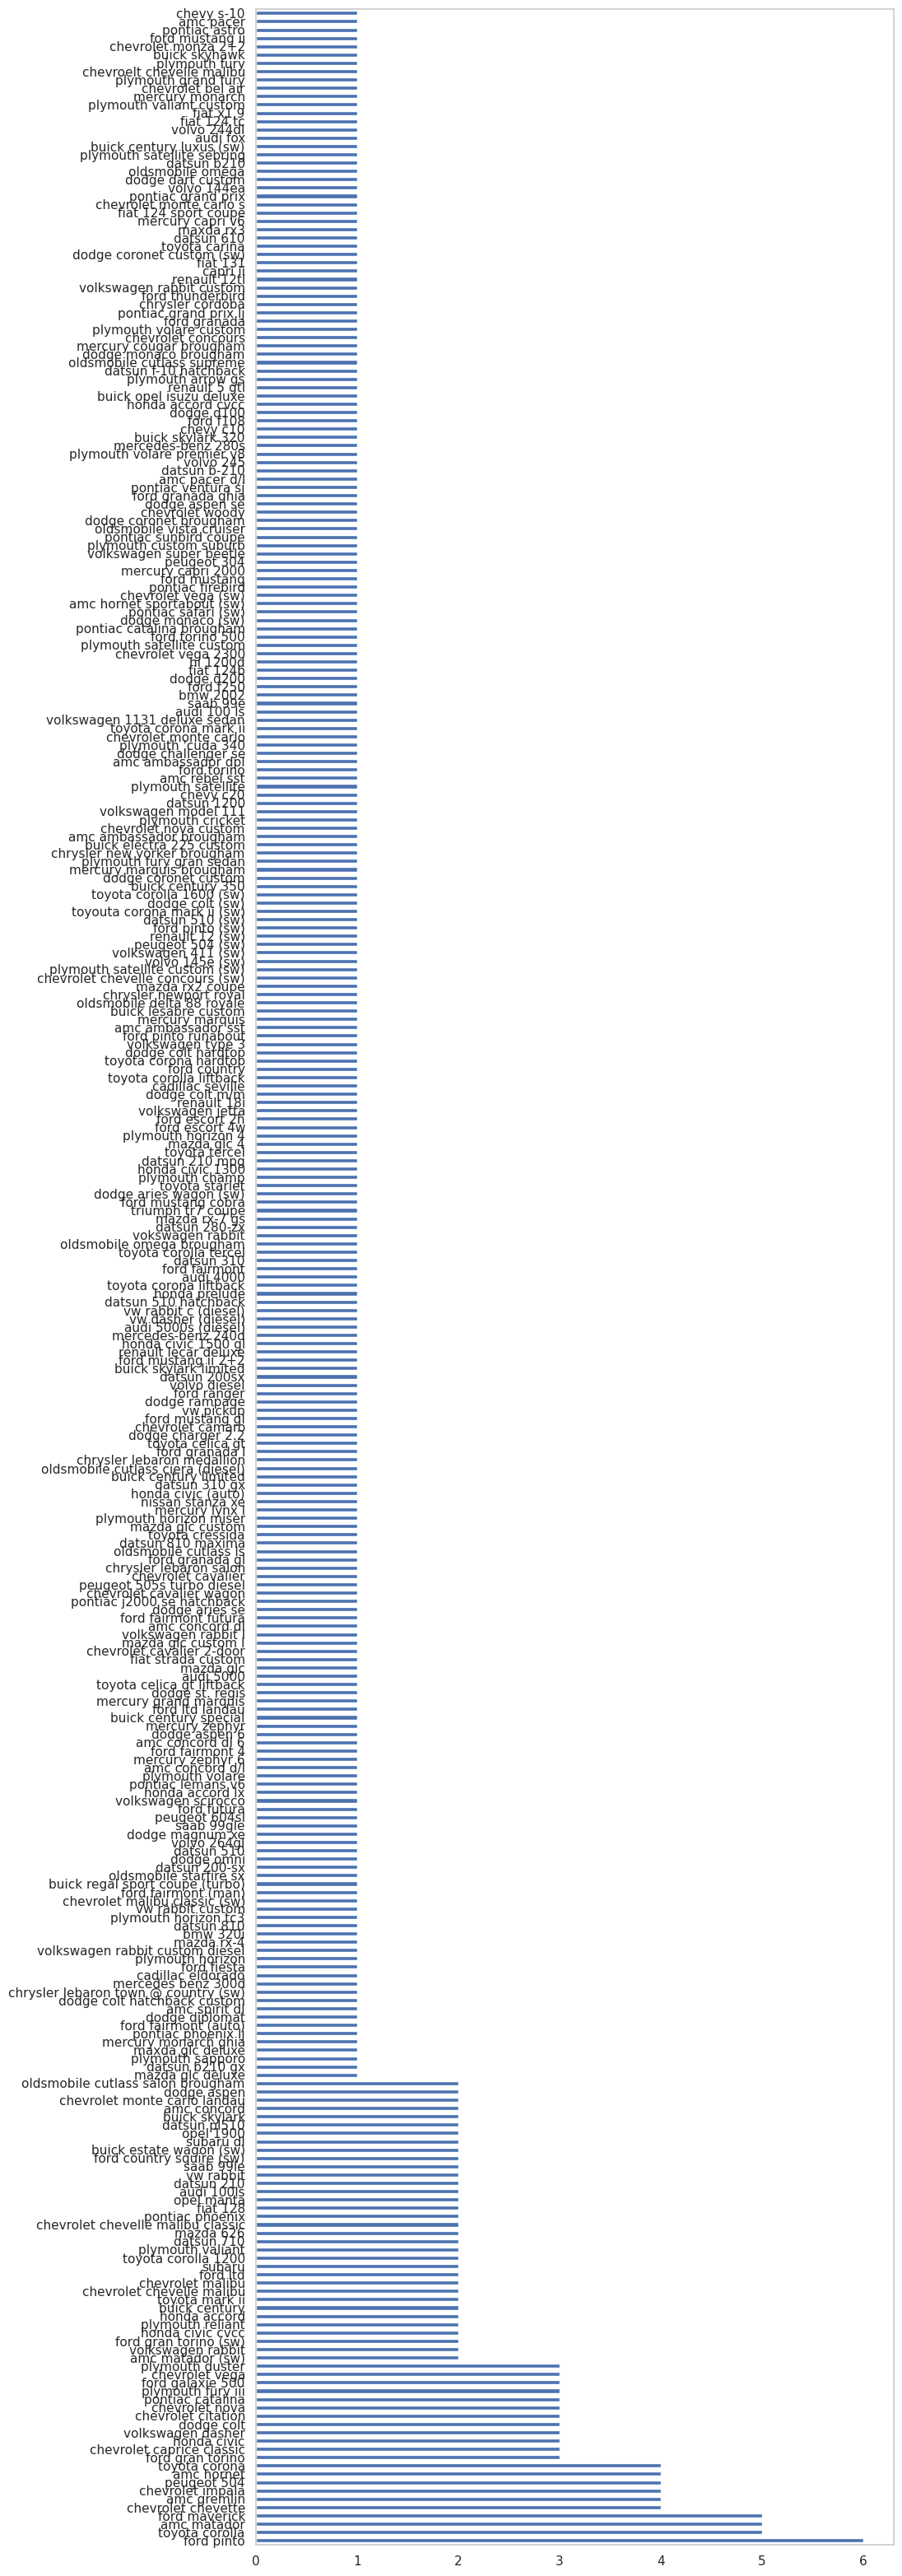

In [22]:
plt.figure(figsize=(10,40))
df['car name'].value_counts().plot(kind='barh')
plt.grid()
plt.show()

Vamos a Agrupoar Por marcas de Vehiculos 

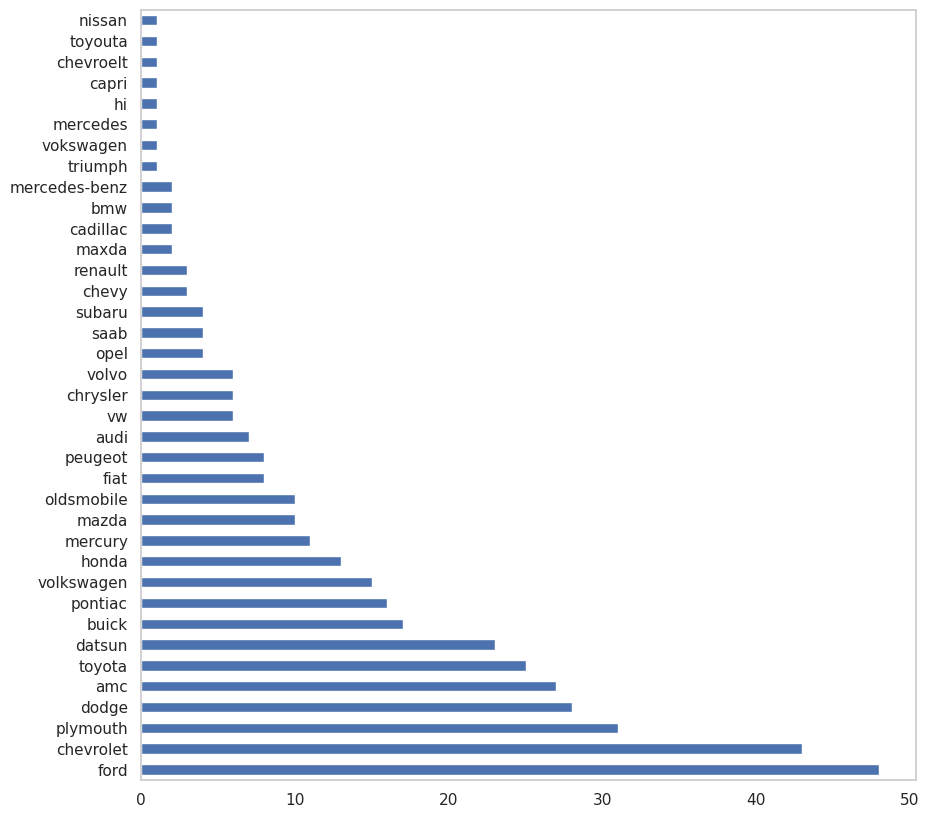

In [29]:
Names=df_c['car name'].values
brand=[]

for name in Names:
    brand.append(name.split()[0])
    
df_c['brand']=brand

plt.figure(figsize=(10,10))
df_c['brand'].value_counts().plot(kind='barh')
plt.grid()
plt.show()

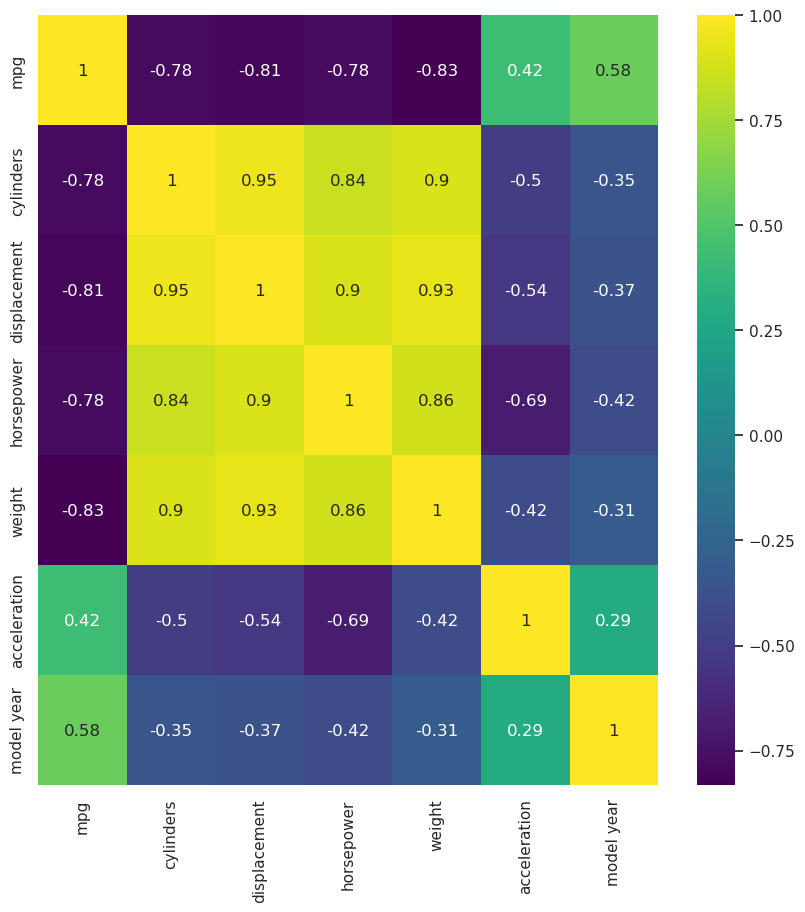

In [30]:
corr=df_c.corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,annot=True,cmap='viridis')
plt.show()

Existe una fuerte correlación lineal entre cylinders, displacement, horsepower y weight, nos vamos quedar entonces con una de estas, aquella con la correlación mas alta es decir weigth 

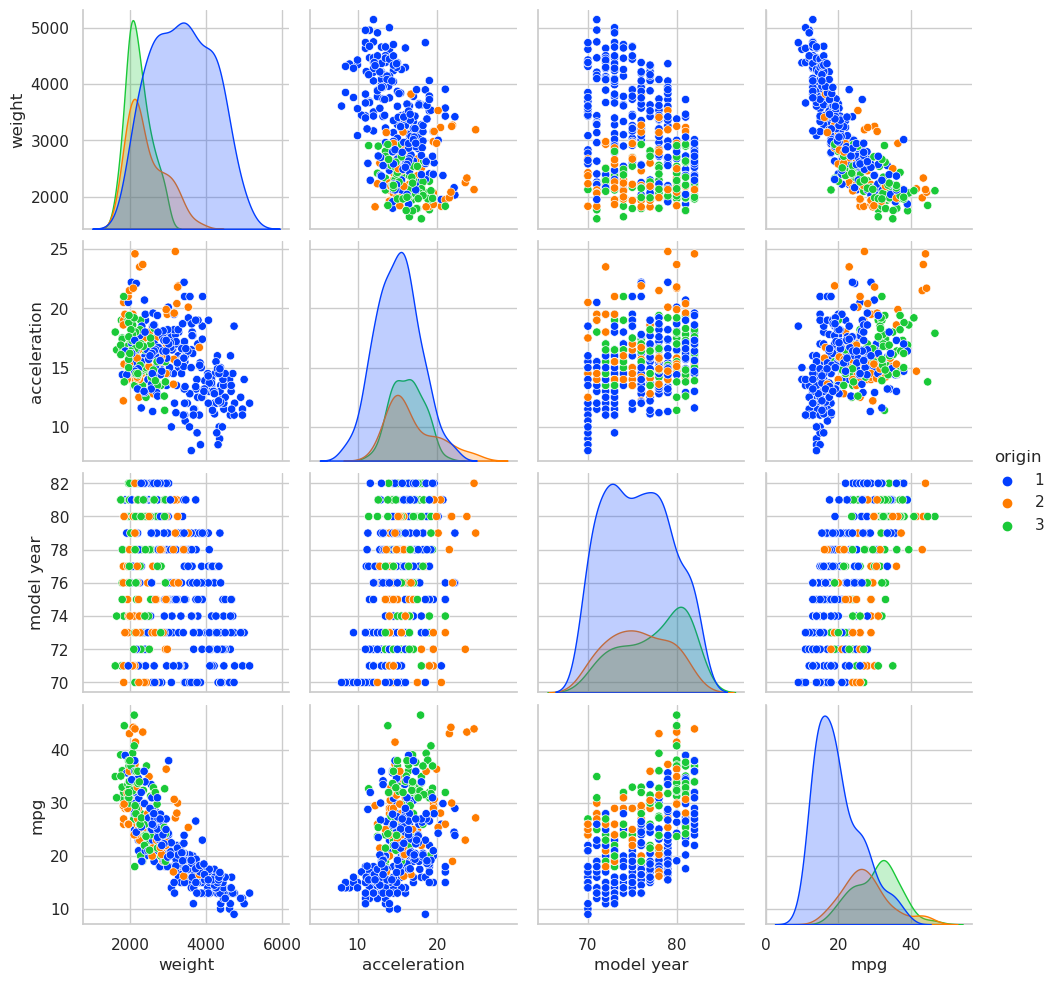

In [33]:
cols=['weight','acceleration','model year','mpg','brand','origin']
sns.pairplot(df_c[cols],hue='origin',palette='bright')
plt.show()

In [49]:
df_c['weightinv']=1/df_c['weight']

In [50]:
df_wd = pd.get_dummies(df_c,columns=['origin'],drop_first=True)
df_wd.head()

/home/andres/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,brand,weightinv,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,chevrolet,0.000285,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,buick,0.000271,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,plymouth,0.000291,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,amc,0.000291,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,ford,0.000290,0,0


In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_cols=list(set(df_wd.columns)-set(['mpg','brand','car name']))
y_cols=['mpg']
X=df_wd[X_cols].values
y=df_wd[y_cols].values

# Separando Entre Entrenamiento y prueba 

X_train,X_test,y_train, y_test = train_test_split(X,y) ## Realiza 75% Train y 25% Test

# Creando las Variables Escaladas

scaler_x=StandardScaler().fit(X)
scaler_y=StandardScaler().fit(y)

X_train=scaler_x.transform(X_train)
X_test=scaler_x.transform(X_test)
y_train=scaler_y.transform(y_train)
y_test=scaler_y.transform(y_test)

# Entrenando el Modelo 

model=LinearRegression()
model.fit(X_train,y_train)

# Realicemos nuestra predicción usando el conjunto de validaciíon 

y_pred=model.predict(X_test)



## Evaluación de las Metricas de Desempeño 



In [67]:
import sklearn.metrics as metrics

mse= metrics.mean_squared_error(y_test,y_pred)
r2= metrics.r2_score(y_test,y_pred)

print(f'El valor de R² es {r2:,.4f}')
print(f'El valor de mse es {mse:,.4f}')
      

El valor de R² es 0.8709
El valor de mse es 0.1180


In [68]:
from regressors import stats
model.intercept_=model.intercept_[0] 
model.coef_=model.coef_.reshape(-1)
print('==========Sumary=======')
stats.summary(model,X_test,y_test.reshape(-1),X_cols)

==========Sumary=======
Residuals:
    Min      1Q  Median     3Q   Max
-1.1134 -0.2199  0.0104 0.1961 1.164


Coefficients:
              Estimate  Std. Error  t value   p value
_intercept   -0.000441    0.035245  -0.0125  0.990046
cylinders    -0.115804    0.097654  -1.1859  0.238574
acceleration  0.015599    0.051879   0.3007  0.764305
origin_2      0.090774    0.042728   2.1245  0.036173
displacement  0.213440    0.169309   1.2607  0.210458
model year    0.404017    0.039434  10.2453  0.000000
horsepower   -0.095656    0.107156  -0.8927  0.374239
weightinv     0.739870    0.131492   5.6267  0.000000
weight        0.067073    0.194472   0.3449  0.730919
origin_3      0.081561    0.048979   1.6652  0.099098
---
R-squared:  0.87094,    Adjusted R-squared:  0.85774
F-statistic: 65.98 on 9 features


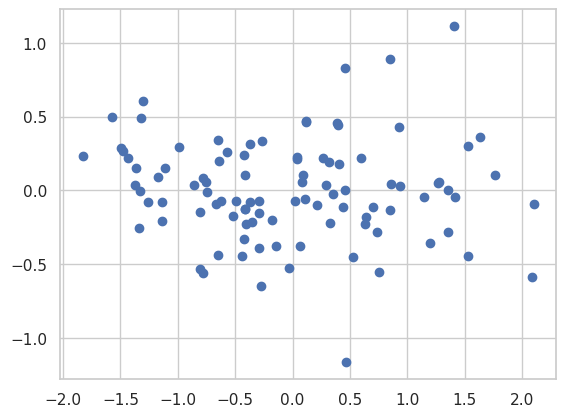

In [69]:
import numpy as np 
residuals=np.subtract(y_test,y_pred)
plt.scatter(y_pred,residuals)


## Empleando solo las variables con significancia estadistia y ingenieria de caracteristicas 

In [61]:
X_cols=['model year','weightinv']
y_cols=['mpg']
X=df_wd[X_cols].values
y=df_wd[y_cols].values

# Separando Entre Entrenamiento y prueba 

X_train,X_test,y_train, y_test = train_test_split(X,y) ## Realiza 75% Train y 25% Test

# Creando las Variables Escaladas

scaler_x=StandardScaler().fit(X)
scaler_y=StandardScaler().fit(y)

X_train=scaler_x.transform(X_train)
X_test=scaler_x.transform(X_test)
y_train=scaler_y.transform(y_train)
y_test=scaler_y.transform(y_test)

# Entrenando el Modelo 

model=LinearRegression()
model.fit(X_train,y_train)

# Realicemos nuestra predicción usando el conjunto de validaciíon 

y_pred=model.predict(X_test)

In [62]:
import sklearn.metrics as metrics

mse= metrics.mean_squared_error(y_test,y_pred)
r2= metrics.r2_score(y_test,y_pred)

print(f'El valor de R² es {r2:,.4f}')
print(f'El valor de mse es {mse:,.4f}')
      

El valor de R² es 0.8294
El valor de mse es 0.1591


In [63]:
from regressors import stats
model.intercept_=model.intercept_[0] 
model.coef_=model.coef_.reshape(-1)
print('==========Sumary=======')
stats.summary(model,X_test,y_test.reshape(-1),X_cols)

==========Sumary=======
Residuals:
    Min     1Q  Median     3Q    Max
-1.4004 -0.161  0.0667 0.2429 0.8894


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept  0.005021    0.040414   0.1243  0.901374
model year  0.397342    0.040169   9.8918  0.000000
weightinv   0.729708    0.044193  16.5118  0.000000
---
R-squared:  0.82938,    Adjusted R-squared:  0.82579
F-statistic: 230.90 on 2 features


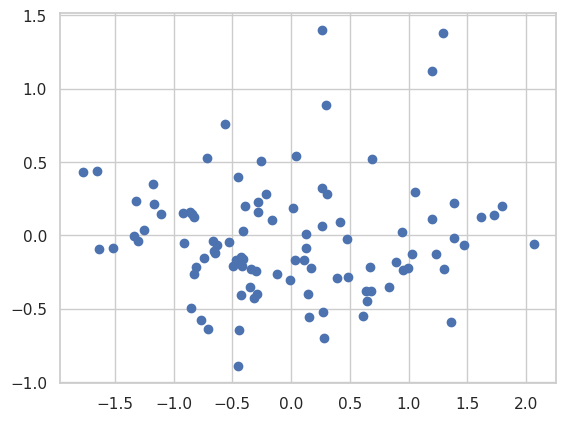

In [65]:
residuals=np.subtract(y_test,y_pred)
plt.scatter(y_pred,residuals)

## Empleando solo las variables con significancia estadistia

In [71]:
X_cols=['model year','weight']
y_cols=['mpg']
X=df_wd[X_cols].values
y=df_wd[y_cols].values

# Separando Entre Entrenamiento y prueba 

X_train,X_test,y_train, y_test = train_test_split(X,y) ## Realiza 75% Train y 25% Test

# Creando las Variables Escaladas

scaler_x=StandardScaler().fit(X)
scaler_y=StandardScaler().fit(y)

X_train=scaler_x.transform(X_train)
X_test=scaler_x.transform(X_test)
y_train=scaler_y.transform(y_train)
y_test=scaler_y.transform(y_test)

# Entrenando el Modelo 

model=LinearRegression()
model.fit(X_train,y_train)

# Realicemos nuestra predicción usando el conjunto de validaciíon 

y_pred=model.predict(X_test)

In [72]:
mse= metrics.mean_squared_error(y_test,y_pred)
r2= metrics.r2_score(y_test,y_pred)

print(f'El valor de R² es {r2:,.4f}')
print(f'El valor de mse es {mse:,.4f}')

El valor de R² es 0.8070
El valor de mse es 0.1912


In [73]:
from regressors import stats
model.intercept_=model.intercept_[0] 
model.coef_=model.coef_.reshape(-1)
print('==========Sumary=======')
stats.summary(model,X_test,y_test.reshape(-1),X_cols)

==========Sumary=======
Residuals:
   Min      1Q  Median     3Q    Max
-1.635 -0.2689  0.0213 0.2952 1.1288


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept -0.000061    0.044177  -0.0014  0.998905
model year  0.353048    0.046099   7.6585  0.000000
weight     -0.711699    0.049163 -14.4762  0.000000
---
R-squared:  0.80699,    Adjusted R-squared:  0.80293
F-statistic: 198.61 on 2 features


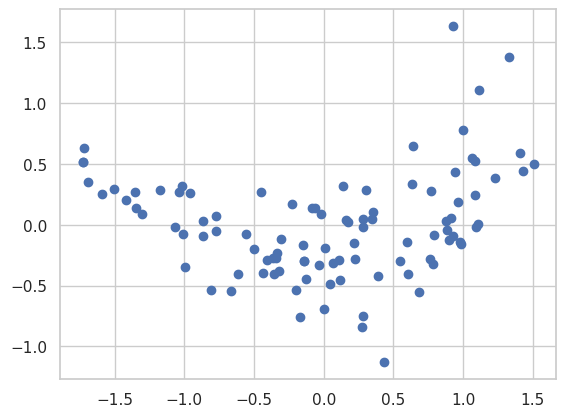

In [74]:
residuals=np.subtract(y_test,y_pred)
plt.scatter(y_pred,residuals)